# Example 1: Using Random Forest Algorithm for Classification

In [ ]:
#

In [ ]:
#Importing Libraries
#We'll be using Pandas to read the data, Seaborn and Matplotlib to visualize it, and NumPy for the great utility methods:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #import Seaborn for data visualization
import matplotlib.pyplot as plt

In [2]:
#Importing the Dataset
#The following code imports the dataset and loads it into a python DataFrame:

dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv")

In [3]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
#Here we can see all the attributes collected during the research.

#Age: ages in years.
#SystolicBP: upper value of Blood Pressure in mmHg, a significant attribute during pregnancy.
#DiastolicBP: lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
#BS: blood glucose levels in terms of a molar concentration, mmol/L.
#HeartRate: resting heart rate in beats per minute.
#RiskLevel: risk level during pregnancy.
#BodyTemp: the body temperature.

In [4]:
#Now that we understand more about what is being measured, we can look at the types of data with info():

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
#From looking at the RangeIndex line, we can see that there are 1014 records, 
#and the column Non-Null Count informs that the data doesn't have any missing values. 
#This means, we won't need to make any treatment for missing data!

#In the Dtype column, we can see the type of each variable. 
#Currently, float64 columns such BS and BodyTemp have numerical values that may vary in any range, 
#such as 15.0, 15.51, 15.76, 17.28, making them numerically continuous 
#(you can always add a 0 to a floating point number, ad infinitum). 
#On the other hand, variables such as Age, SystolicBP, DiastolicBP, and HeartRate are of the type int64, 
#this means that the numbers only change by the unit, such as 11, 12, 13, 14 - we won't have a heart rate of 77.78, 
#it is either 77 or 78 - those are numerically discrete values. 
#And we also have RiskLevel with a object type, this usually indicates that the variable is a text, 
#and we will probably need to transform it into a number. Since the risk level grows from low to high, 
#there is an implied order in the categories, this indicates it is a categorically ordinal variable.

In [ ]:
#Note: it is important to look at the type of each data, and see if it makes sense according to its context. 
#For instance, it doesn't make sense to have half of a heart rate unit, so this means the integer type is adequate 
#for a discrete value. When that doesn't happen, you can change the 
#type of the data with Pandas' astype() property - df['column_name'].astype('type').

In [ ]:
#After looking at data types, we can use describe() to take a peek at some descriptive statistics, 
#such as the mean values of each column, the standard deviation, quantiles, minimum and maximum data values:

In [ ]:
dataset.describe().T # T transposes the table

In [ ]:
#Notice that for most columns, the mean values are far from the standard deviation (std) - this indicates that 
#the data doesn't necessarily follow a well behaved statistical distribution (e.g. a normal distribution). 
#If it did, it would've helped the model when predicting the risk. 
#What can be done here is to preprocess the data to make it more representative 
#as if it were data from the whole world population, or more normalized. 
#But, an advantage when using Random Forest models for classification, 
#is that the inherent tree structure can deal well with data that has not been normalized, 
#once it divides it by the value in each tree level for each variable.

#Also, because we are using trees and that the resulting class will be obtained by voting, 
#we aren't inherently comparing between different values, only between the same types of values, 
#so adjusting the features to the same scale isn't necessary in this case. 
#This means that the Random Forest classification model is scale invariant, and you don't need to perform feature scaling.

#In this case, the step in data preprocessing we can take is to transform the categorical RiskLevel column into a numerical one.

In [ ]:
#Visualizing the Data
#Before transforming RiskLevel, let's also quickly visualize the data by looking at the combinations of 
#points for each pair of features with a Scatterplot and how the points are distributed by visualizing the histogram curve. 
#To do that, we will use Seaborn's pairplot() which combines both plots. 
#It generates both plots for each feature combination and displays the points color coded according to their risk level 
#with the hue property

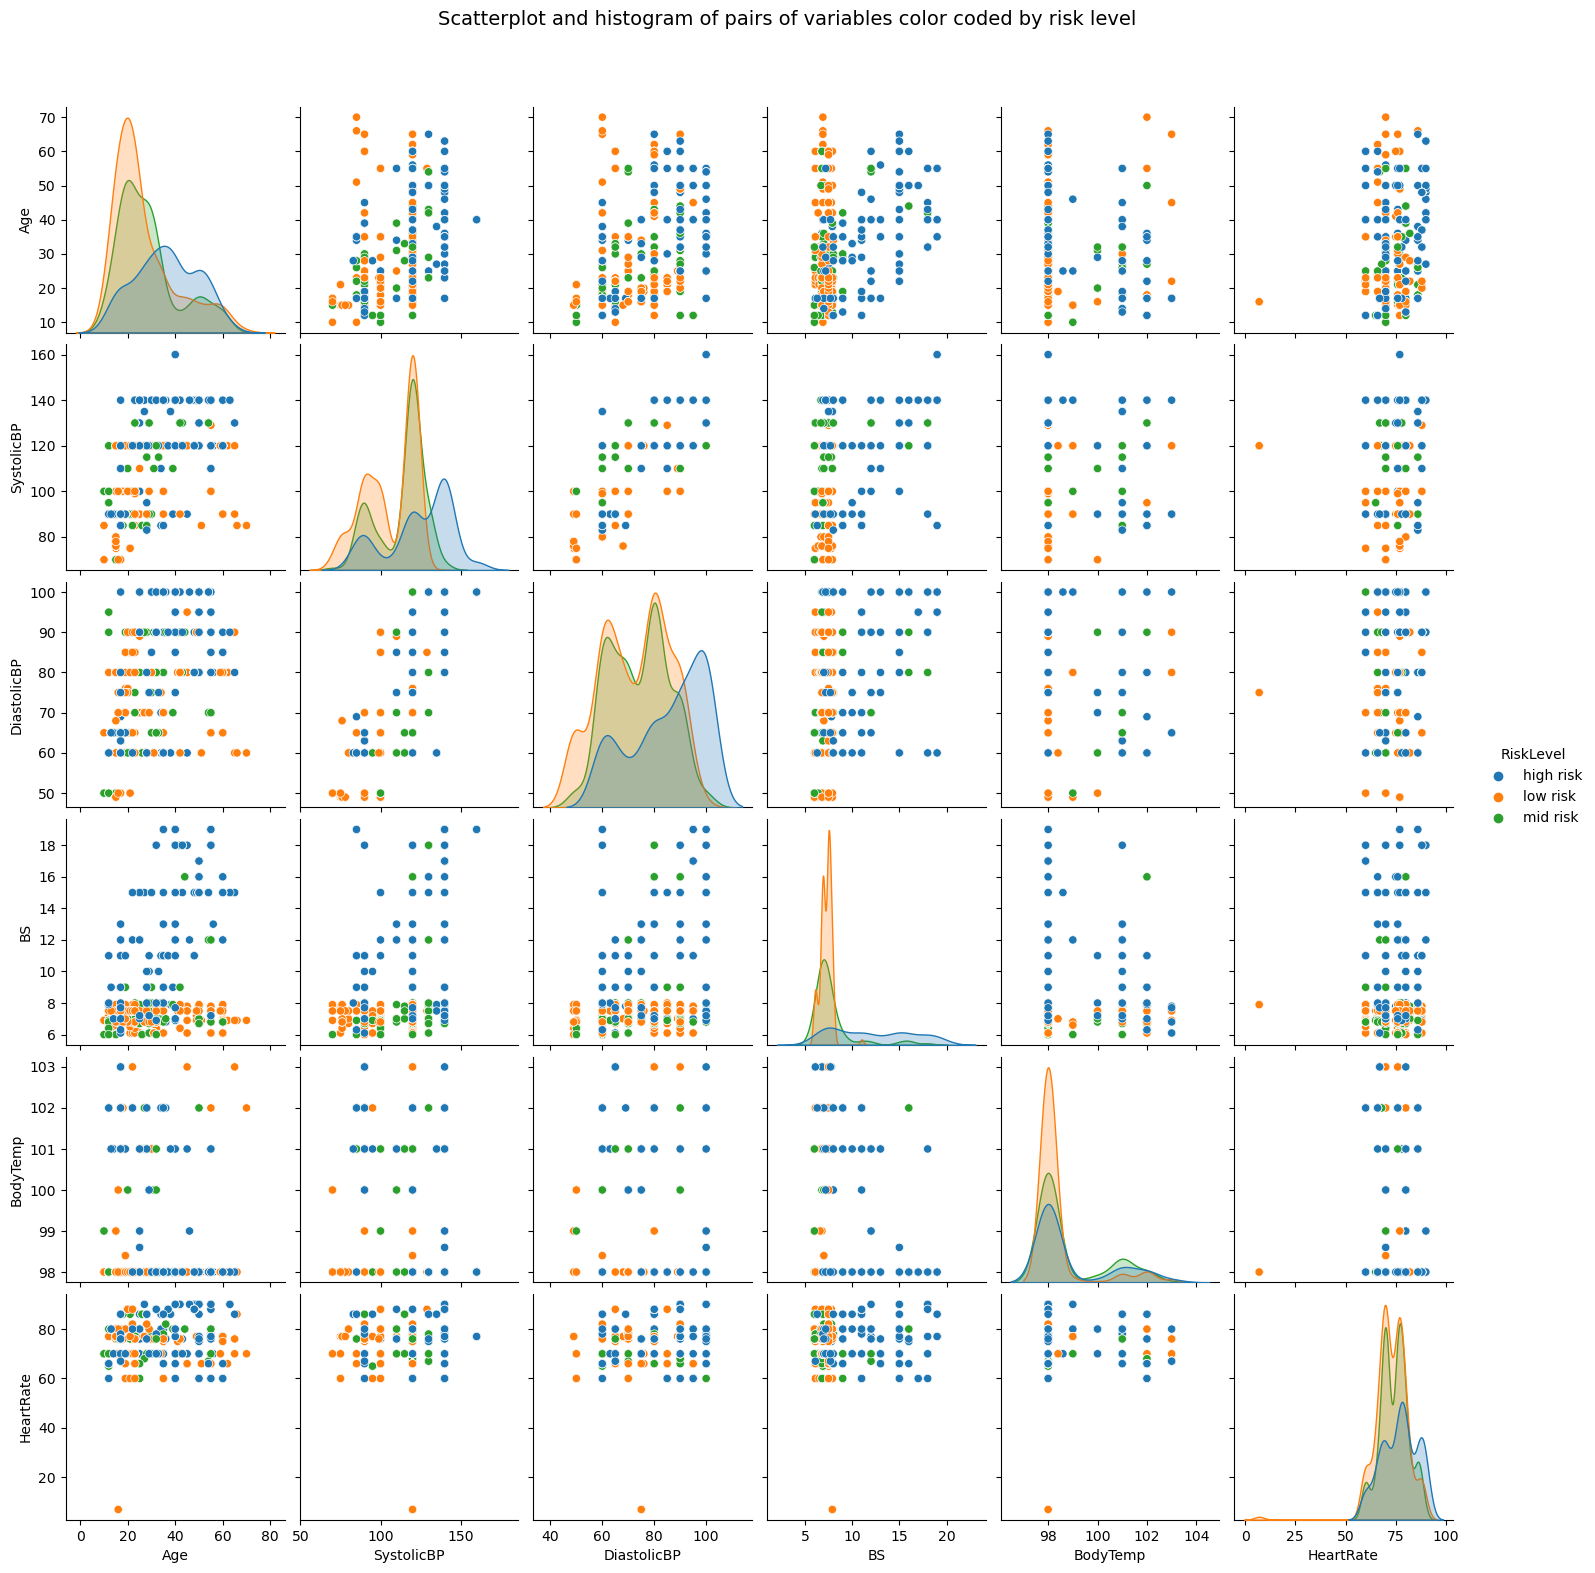

In [5]:
g = sns.pairplot(dataset, hue='RiskLevel')
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by risk level", 
               fontsize = 14, # defining the size of the title
               y=1.05);

In [ ]:
#When looking at the plot, the ideal situation would be to have a clear separation between curves and dots. 
#As we can see, the three types of risk classes are mostly mixed up, 
#since trees internally draw lines when delimiting the spaces between points, 
#we can hypothesize that more trees in the forest might be able to limit more spaces and better classify the points.

In [ ]:
#With the basic exploratory data analysis done, we can preprocess the RiskLevel column.

In [6]:
#Data Preprocessing for Classification
#To be sure there are only three classes of RiskLevel in our data, and that no other values have been added erroneously, 
#we can use unique() to display the column's unique values:

dataset['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [8]:
#The classes are checked, now the next step is to transform each value into a number. 
#Since there is an order between classifications, we can use the values 0, 1 and 2 to signify low, medium and high risks. 
#There are many ways to change the column values, following Python's simple is better that complex motto, 
#we will use the .replace() method, and simply replace them with their integer representations:

dataset['RiskLevel'] = dataset['RiskLevel'].replace('low risk', 0).replace('mid risk', 1).replace('high risk', 2)

In [9]:
#After replacing the values, we can divide the data into what will be used for training the model, 
#the features or X, and what we want to predict, the labels or y:

y = dataset['RiskLevel']
X = dataset.drop(['RiskLevel'], axis=1)

In [ ]:
#Once the X and y sets are ready, we can use Scikit-Learn's train_test_split() method to further 
#divide them into the train and test sets:

In [10]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [ ]:
#Advice: remember to use a random state seed if you want to make the result reproducible. 
#We've used a random state seed so you can reproduce the same results as from the guide.

In [ ]:
#Here, we are using 20% of the data for testing and 80% for training.

In [ ]:
#Step Training a RandomForestClassifier

In [ ]:
#Scikit-Learn implemented ensembles under the sklearn.ensemble module. 
#An ensemble of decision trees used for classification, in which a majority vote is taken, 
#is implemented as the RandomForestClassifier.

#Having the train and test sets, we can import the RandomForestClassifier class and create the model. 
#To start, let's create a forest with three trees, by setting n_estimators parameter as 3, 
#and with each tree having three levels, by setting max_depthto 2:

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=2,
                             random_state=SEED)

In [ ]:
#Note: The default value for n_estimators is 100. 
#This boosts the predictive power and generalization of the ensemble, 
#but we're creating a smaller one to make it easier to visualize and inspect it. 
#With just 3 trees - we can visualize and inspect them manually to further build our 
#intuition of both the individual trees, and their co-dependence. 
#The same applies for max_depth, which is None, meaning the trees can get deeper and deeper to fit the data as required.

In [14]:
#To fit the model around the data - we call the fit() method, passing in the training features and labels:

# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)


In [15]:
#Display predictions y_pred
y_pred

array([0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0], dtype=int64)

In [16]:
#Display y-test and compare with y_pred above

y_test

752    1
519    2
210    2
611    0
914    0
      ..
370    0
381    1
780    1
760    1
682    2
Name: RiskLevel, Length: 203, dtype: int64

In [ ]:
#We can now compare the predicted labels against the real labels to evaluate how well the model did! 
#Before evaluating the model, let's take a look into the ensemble.

#To look a little deeper into the model, we can visualize each of the trees and how they are dividing the data. 
#This can be done by using the tree module built into Scikit-Learn, and then looping through each of the estimators in the ensemble:

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1608637542)


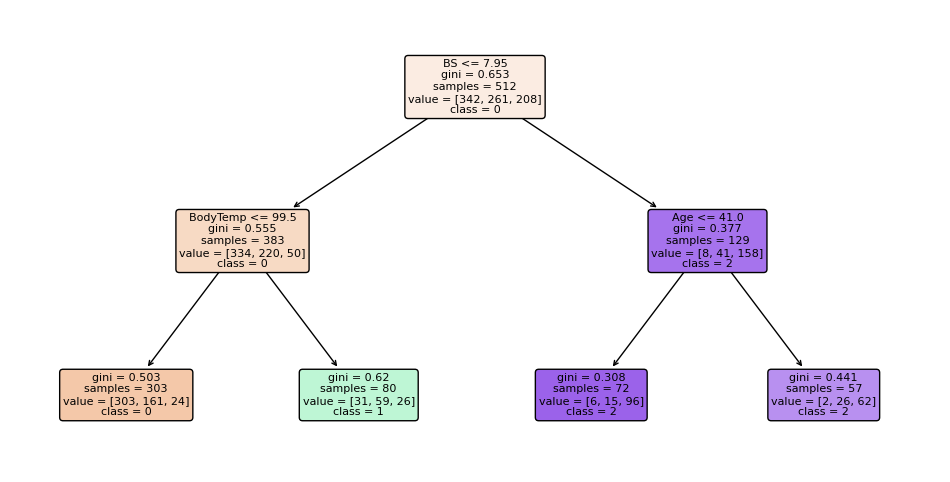

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1273642419)


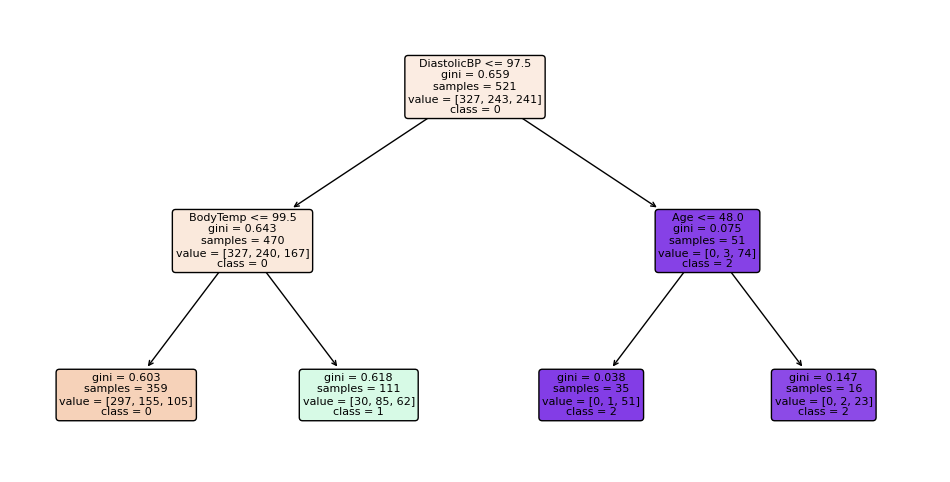

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1935803228)


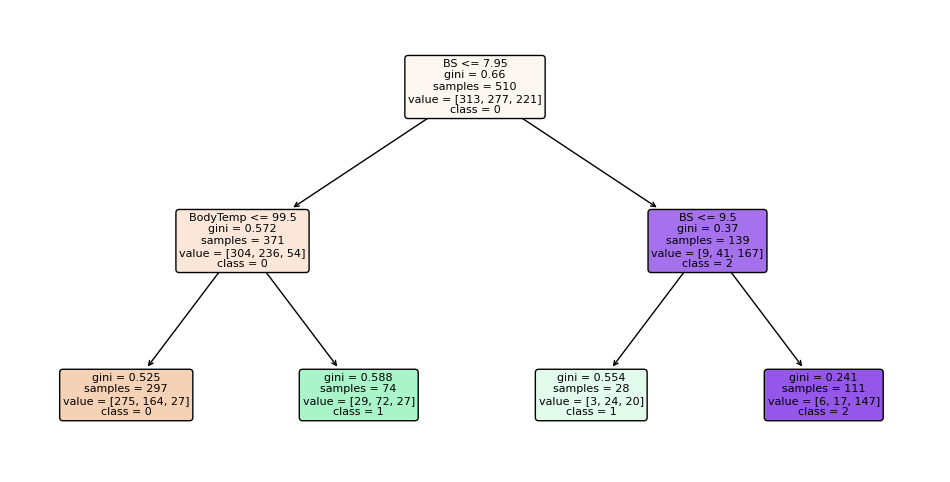

In [13]:
# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [ ]:
#Notice how the three trees are different. The first one starts with the BS feature, the second with DiastolicBP, 
#and the third with BS again. Although the third looks at a different number of samples. 
#On the right branch, the first two trees also decide using Age at the leaf level, while the third tree ends with BS feature. 
#With just three estimators, it's clear how scaling up gives a rich, 
#diverse representation of the knowledge that can be successfully ensembled into a highly-accurate model.

In [ ]:
#The more trees in the forest, the more diverse the model can be. 
#There is a point of diminishing returns, though, as with many trees fit on a random subset of features, 
#there will be a fair bit of similar trees that don't offer much diversity in the ensemble, 
#and which will start to have too much voting power and skew the ensemble to be overfit on the training dataset, 
#hurting generalization to the validation set.

In [ ]:
#Evaluating the RandomForestClassifier

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.89      0.66        80
           1       0.57      0.17      0.26        76
           2       0.74      0.72      0.73        47

    accuracy                           0.58       203
   macro avg       0.61      0.59      0.55       203
weighted avg       0.59      0.58      0.53       203



In [ ]:
#Note: It's practically impossible to obtain a 100% accuracy on any real data that you'd want to apply machine learning to. 
#If you see a 100% accuracy classifier, or even a near-100% result - be skeptical, and perform evaluation. 
#A common cause for these issues are data leakage (leaking part of the training test into a test set, directly or indirectly).
#There's no consensus on what "a good accuracy is", primarily because it depends on your data - sometimes, a 70% accuracy
#will be high! Sometimes, that'll be a really low accuracy. 
#Generally speaking, over 70% is sufficient for many models, but this is on the domain researcher to determine.

In [ ]:
#In the classification report, observe that the recall is high, 0.89 for class 0, 
#both precision and recall are high for class 2, 0.74, 0.72 - and for class 1, they are low, 
#especially the recall of 0.17 and a precision of 0.57. 
#The relationship between the recall and precision for all three classes individually is captured in the F1 score, 
#which is the harmonic mean between recall and precision - the model is doing okay for class 0, 
#fairly bad for class 1 and decent for class 2.

#It appears that the model is having a very hard time when identifying the medium risk cases.

In [ ]:
#The accuracy achieved by our random forest classifier with only 3 trees is of 0.58 (58%) - this means it is 
#getting a bit more than half of the results right. 
#This is a low accuracy, and perhaps could be improved by adding more trees.

#By looking at the confusion matrix, we can see that most of the mistakes are when classifying 
#52 records of medium risk as low risk, which gives further insight to the low recall of class 1. 
#It's biased towards classifying medium-risk patients as low-risk patients.

#Another thing that can be checked to generate even more insight is what features are most taken into consideration 
#by the classifier when predicting. This is an important step to take for explainable machine learning systems, 
#and helps identify and mitigate bias in models.

In [ ]:
#To see that, we can access the feature_importances_ property of the classifier. 
#This will give us a list of percentages, so we can also access the feature_names_in_ property to get 
#the name of each feature, organize them in a dataframe, sort them from highest to lowest, and plot the result:

In [20]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

# Example 2: Random Forest + Possum Dataset

In [17]:
#Importing Libraries and Data:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Importing the Dataset
#The following code imports the dataset and loads it into a python DataFrame:
#Next, read the data in, and investigate five rows from it at random with:

df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/possum.csv",index_col=0).dropna()
df.sample(5,random_state = 44)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
BR5,58,4,other,m,3.0,94.5,64.2,91.0,39.0,66.5,46.4,14.4,30.5,33.0
BSF8,81,6,other,m,3.0,90.6,56.0,85.5,38.0,65.6,41.7,17.0,27.5,35.0
C64,28,1,Vic,m,4.0,93.8,56.8,87.0,34.5,73.2,53.0,15.3,27.0,30.0
BTP14,98,7,other,m,5.0,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0
CD2,62,5,other,f,3.0,91.3,58.0,90.5,39.0,65.5,41.3,16.0,27.0,32.0


In [47]:
#Let’s do a quick clean up and remove any rows with missing data with:

df = df.dropna()

In [24]:
#(If you do df.info() before and after df.dropna(), you’ll see that we’ve removed three rows from the dataframe.)

#Now let’s remove the unnecessary columns, then store the features and the label data in separate variables:

X = df.drop(["case", "site", "Pop", "sex"], axis=1)
y = df["sex"]

In [25]:
X.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
C3,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
C5,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
C10,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
C15,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
C23,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
#Step 2. – Training our random forest model
#At this step we’ll create our first random forest:

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [ ]:
#Let's break the above code down for you:

#1. from sklearn.model_selection import train_test_split >> 
#This line imports train_test_split which we’ll make it possible to randomly separate our dataset into train and test data.

#2. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) >> 
#This is where we allocate 30% (test_size=0.3) of our data to training features (X_train) and labels (y_train), 
#while the rest goes to test data (X_test, y_test). You may choose to use random_state=44 as well to get the same results as I.

#3. from sklearn.ensemble import RandomForestClassifier >> 
#We finally import the random forest model. 
#The ensemble part from sklearn.ensemble is a telltale sign that random forests are ensemble models. 
#It’s a fancy way of saying that this model uses multiple models in the background (=multiple decision trees in this case).

#4. rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44) >> 
#This is where we create our model with our chosen settings.

#5. n_estimators determines the number of decision trees that make up our random forest. The more, the better.

#6. max_features defines the number of features that each decision tree takes into consideration at each split. 
#If you read the scikit-learn documentation, you’ll know that the default value for max_features is auto, 
#which is actually the same as sqrt (=the square root of the number of features)). Using sqrt is the recommended setting.

#7. rf_model.fit(X_train, y_train) >> Finally, we create our model based on the training data.

#There is a setting for bootstrapping: bootstrap=True, but since it’s the default setting, 
#I’ve simply left it out (hope you don’t mind!)

In [27]:
#Step 3. – Making predictions with our model
#It’s as simple as this:

predictions = rf_model.predict(X_test)
predictions
    
    

array(['f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm',
       'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm',
       'm', 'm', 'm', 'm', 'f'], dtype=object)

In [53]:
#You just give some data (X_test) to your model (rf_model), then call the predict() method too, well, make predictions. 
#The predictions are saved to predictions.

#You can compare the predicted values (predictions) to the true values (y_test), if you’re curious:

y_test

BR5      m
BSF8     m
C64      m
BTP14    m
CD2      f
CD10     f
C27      f
C63      f
C60      m
CD6      f
CD12     m
A3       m
BB31     f
BSF4     m
C50      f
BTP21    f
BB44     m
BB4      m
C34      f
CD13     m
BSF11    m
BB33     f
C24      f
BSF1     f
WW6      m
BTP10    m
BR4      f
BTP13    m
BTP5     m
BTP6     m
BTP15    f
Name: sex, dtype: object

In [28]:
#You can even check the probabilities assigned by your model to each prediction with predict_proba():

rf_model.predict_proba(X_test)

array([[0.5 , 0.5 ],
       [0.26, 0.74],
       [0.36, 0.64],
       [0.3 , 0.7 ],
       [0.66, 0.34],
       [0.54, 0.46],
       [0.48, 0.52],
       [0.42, 0.58],
       [0.18, 0.82],
       [0.34, 0.66],
       [0.48, 0.52],
       [0.54, 0.46],
       [0.4 , 0.6 ],
       [0.28, 0.72],
       [0.48, 0.52],
       [0.36, 0.64],
       [0.4 , 0.6 ],
       [0.54, 0.46],
       [0.44, 0.56],
       [0.06, 0.94],
       [0.32, 0.68],
       [0.56, 0.44],
       [0.66, 0.34],
       [0.46, 0.54],
       [0.18, 0.82],
       [0.46, 0.54],
       [0.34, 0.66],
       [0.26, 0.74],
       [0.2 , 0.8 ],
       [0.1 , 0.9 ],
       [0.5 , 0.5 ]])

In [ ]:
#Each array contains two probabilities in this case because we have two categories to predict: male or female. 
#The left value shows the predicted probability of belonging to the category of female, 
#the second shows the same for belonging to the category of male.

#How do we know this?

#With the help of classes_:



In [29]:
#show the order of the classes:

rf_model.classes_

array(['f', 'm'], dtype=object)

In [30]:
#If you’d like to know how important each feature is in predicting a possum’s sex, 
#that’s also possible with feature_importances_:

rf_model.feature_importances_

array([0.05237143, 0.1461762 , 0.08878178, 0.11322144, 0.07150935,
       0.16099193, 0.11990223, 0.11082213, 0.05286153, 0.08336197])

In [ ]:
#feature_importances_ reflects the order of the columns in your features dataframe so you just need to 
#match its values to the features’ names, like this:

In [31]:
importances = rf_model.feature_importances_
columns = X.columns

i=0

while i < len(columns):
    print(f" The importance of feature '{columns[i]}' is {round(importances[i]*100, 2)}%")
    i +=1

 The importance of feature 'age' is 5.24%
 The importance of feature 'hdlngth' is 14.62%
 The importance of feature 'skullw' is 8.88%
 The importance of feature 'totlngth' is 11.32%
 The importance of feature 'taill' is 7.15%
 The importance of feature 'footlgth' is 16.1%
 The importance of feature 'earconch' is 11.99%
 The importance of feature 'eye' is 11.08%
 The importance of feature 'chest' is 5.29%
 The importance of feature 'belly' is 8.34%


In [ ]:
#Interesting to see that head length (footlgth) has the highest predicting power (16.1%) in a possum’s sex, isn’t it? 🙂

#By the way, at this point your random forest model is ready, so feel free to feed any new data to it to make a new prediction:

In [32]:
new_possum = [[7.0, 83.2,54.3,81.0, 37.0, 70.0, 46.3, 14.7, 25.0, 32.0]]
rf_model.predict(new_possum)

C:\Users\abiy3759\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['m'], dtype=object)

In [ ]:
#This is how you create a Random Forest model in Python with scikit-learn. 
#The amazing thing about Random Forest models is that they’re easy to comprehend and 
#can be utilized with great effect without any complicated hyperparameter tuning.